# MNIST手写字符体识别

In [18]:
# TensorFlow and tf.keras
# conda install -c conda-forge tensorflow 安装 
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

print(tf.__version__)

2.12.0


## 导入 MNIST 数据集

我们使用 60,000 张图像来训练网络，使用 10,000 张图像来评估网络学习对图像进行分类的准确程度。可以直接从tf.keras.datasets.mnist 中导入和加载 MNIST 数据，原始的4个idx文件打包为一个npz文件。

In [19]:
!mkdir -p ~/.keras/datasets
!cp mnist.npz ~/.keras/datasets

命令语法不正确。
'cp' 不是内部或外部命令，也不是可运行的程序
或批处理文件。


In [20]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() # path='mnist.npz', relative to ~/.keras/datasets

# path="./mnist.npz"
# with np.load(path, allow_pickle=True) as f:
#     train_images, train_labels = f['x_train'], f['y_train']
#     test_images, test_labels = f['x_test'], f['y_test']

train_images = tf.expand_dims(train_images, axis=3, name=None)
test_images = tf.expand_dims(test_images, axis=3, name=None)

class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

加载数据集会返回四个 NumPy 数组：

- `train_images` 和 `train_labels` 数组是*训练集*，即模型用于学习的数据。
- `test_images` 和 `test_labels` 数组是*测试集*，会被用来对模型进行测试。

图像是 28x28 的 NumPy 数组，像素值介于 0 到 255 之间。每个图像都会被映射到一个标签，标签是整数数组，介于 0 到 9 之间。


## 浏览数据

以下代码显示训练集中有 60,000 个图像，每个图像由 28 x 28 的像素表示：

In [22]:
train_images.shape

TensorShape([60000, 28, 28, 1])

同样，训练集中有 60,000 个标签：

In [23]:
len(train_labels)

60000

每个标签都是一个 0 到 9 之间的整数：

In [24]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

测试集中有 10,000 个图像。同样，每个图像都由 28x28 个像素表示：

In [25]:
test_images.shape

TensorShape([10000, 28, 28, 1])

测试集包含 10,000 个图像标签：

In [26]:
len(test_labels)

10000

## 预处理数据

在训练网络之前，可以对数据进行预处理。原始的mnist像素值处于 0 到 255 之间：

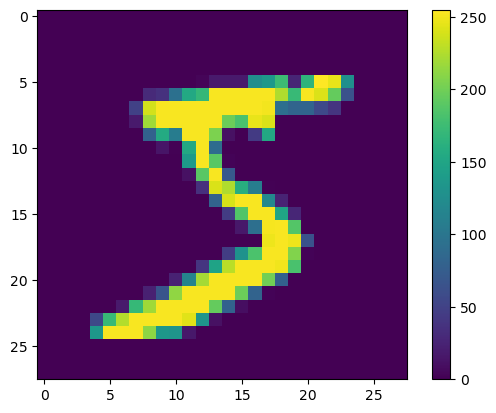

In [27]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [28]:
# 也可以将取值归一化0-1
train_images = train_images / 255
test_images = test_images / 255

train_images = tf.cast(train_images, tf.float32)
test_images = tf.cast(test_images, tf.float32)

为了验证数据的格式是否正确，以及是否已准备好构建和训练网络，显示训练集中的前 25 个图像，并在每个图像下方显示类名称。

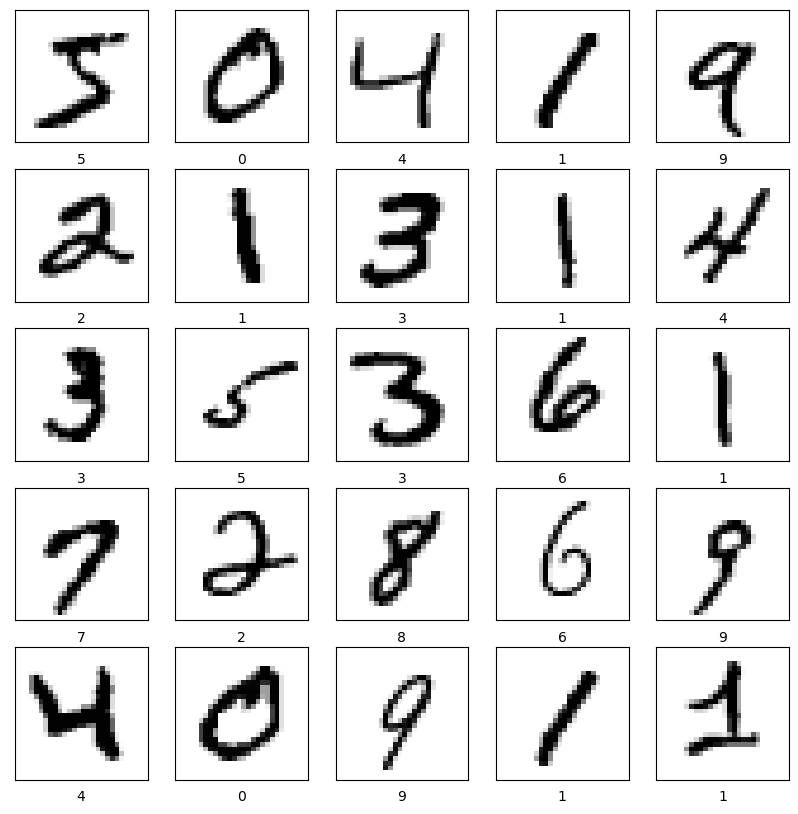

In [29]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## 构建模型


In [30]:
# LeNet
# model = tf.keras.models.Sequential([
#         tf.keras.layers.Conv2D(filters=6, kernel_size=5, activation='relu',
#                                padding='same'),
#         tf.keras.layers.AvgPool2D(pool_size=2, strides=2),
#         tf.keras.layers.Conv2D(filters=16, kernel_size=5,
#                                activation='relu'),
#         tf.keras.layers.AvgPool2D(pool_size=2, strides=2),
#         tf.keras.layers.Flatten(),
#         tf.keras.layers.Dense(120, activation='relu'),
#         tf.keras.layers.Dense(84, activation='sigmoid'),
#         tf.keras.layers.Dense(10
#                               #, activation='softmax'
#                              )])


# AlexNet

# 调整输入输出大小
# train_images = tf.image.resize(images=train_images, size=(224, 224))
# test_images = tf.image.resize(images=test_images, size=(224, 224))
#
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Conv2D(filters=96, kernel_size=11, strides=4,
#                            activation='relu'),
#     tf.keras.layers.MaxPool2D(pool_size=3, strides=2),
#     tf.keras.layers.Conv2D(filters=256, kernel_size=5,
#                            activation='relu', padding='same'),
#     tf.keras.layers.MaxPool2D(pool_size=3, strides=2),
#     tf.keras.layers.Conv2D(filters=384, kernel_size=3,
#                            activation='relu', padding='same'),
#     tf.keras.layers.Conv2D(filters=384, kernel_size=3,
#                            activation='relu', padding='same'),
#     tf.keras.layers.Conv2D(filters=256, kernel_size=3,
#                            activation='relu', padding='same'),
#     tf.keras.layers.MaxPool2D(pool_size=3, strides=2),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(4096, activation='relu'),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(4096, activation='relu'),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(10, activation='softmax'),
# ])


# DNN

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    # tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax'),
])


# 自定义网络

model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(filters=64, kernel_size=5, activation='relu',
                               padding='same'),
        tf.keras.layers.AvgPool2D(pool_size=2, strides=2),
        tf.keras.layers.Conv2D(filters=128, kernel_size=5,
                               activation='relu'),
        tf.keras.layers.AvgPool2D(pool_size=2, strides=2),
        tf.keras.layers.Conv2D(filters=256, kernel_size=3,
                               activation='relu', padding='same'),
        tf.keras.layers.Conv2D(filters=256, kernel_size=2,
                               activation='relu', padding='same'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1024, activation='relu'),
        tf.keras.layers.Dense(128, activation='sigmoid'),
        tf.keras.layers.Dense(10
                              #, activation='softmax'
                             )])


该网络的第一层 `tf.keras.layers.Flatten` 将图像格式从二维数组（28 x 28 像素）转换成一维数组（28 x 28 = 784 像素）。将该层视为图像中未堆叠的像素行并将其排列起来。该层没有要学习的参数，它只会重新格式化数据。

展平像素后，网络会包括两个 `tf.keras.layers.Dense` 层的序列。它们是密集连接或全连接神经层。第一个 `Dense` 层有 128 个节点（或神经元）。第二个（也是最后一个）层会返回一个长度为 10 的 logits 数组。每个节点都包含一个得分，用来表示当前图像属于 10 个类中的哪一类。

而后，设置损失函数、优化器和指标：

In [31]:
model.compile(
            optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
            # optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-06),
            # optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.01, epsilon=1e-06),
            # optimizer=tf.keras.optimizers.Adadelta(learning_rate=1.0, rho=0.95, epsilon=1e-06),
            # optimizer=tf.keras.optimizers.Nadam(learning_rate=0.002, beta_1=0.9, beta_2=0.999, epsilon=1e-06),
            # optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
            loss='mse',   #配合one_hot
            # loss = 'categorical_crossentropy',
            # loss = 'categorical_hinge',
            metrics=['accuracy'])

## 训练模型

In [32]:
train_labels = tf.one_hot(train_labels, 10) * 1.0
#print(train_labels)
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 133s 71ms/step - loss: 0.0421 - accuracy: 0.8312

### 评估准确率

接下来，比较模型在测试数据集上的表现：

In [33]:
test_labels = tf.one_hot(test_labels, 10) * 1.0
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 8s - loss: 0.0159 - accuracy: 0.9590 - 8s/epoch - 25ms/step

Test accuracy: 0.9589999914169312
